In [1]:
import torch 
from train import trainAR
from models import *
from matplotlib import pyplot as plt
import build

In [2]:
def gen_signal(freq):
    return torch.sin(freq * torch.arange(0, 1000).float()).view(1, 1000) * 0.9
dataset = [(gen_signal(f), 0) for f in torch.arange(0.1, 1.0, 0.01)]
loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

In [3]:
c = 100
model = Sequential(
    ConvBlock(1, c, 1, shift=1),
    Res(GatedConvBlock(c, c, 2)),
    Res(GatedConvBlock(c, c, 4)),
    Res(GatedConvBlock(c, c, 8)),
    Res(GatedConvBlock(c, c, 16)),
    Res(GatedConvBlock(c, c, 32)),
    Res(GatedConvBlock(c, c, 64)),
    Res(GatedConvBlock(c, 1, 128)),
    torch.nn.Tanh()
)
print(sum(p.numel() for p in model.parameters()), 'parameters')
print(model)

243402 parameters
Sequential(
  (0): Sequential(
    (0): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Activation(negative_slope=0.2)
    (2): Padded(
      padding=(2, -1)
      (f): Conv1d(1, 100, kernel_size=(2,), stride=(1,), bias=False)
    )
  )
  (1): Sum(
    (f): Identity()
    (g): Product(
      (f): Sequential(
        (0): Sequential(
          (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): Activation(negative_slope=0.2)
          (2): Padded(
            padding=(2, 0)
            (f): Conv1d(100, 100, kernel_size=(2,), stride=(1,), dilation=(2,), bias=False)
          )
        )
        (1): Tanh()
      )
      (g): Sequential(
        (0): Sequential(
          (0): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (1): Activation(negative_slope=0.2)
          (2): Padded(
            padding=(2, 0)
            (f): Conv1d(100, 100,

In [10]:
trainAR(
    trial=None,
    device='cpu',
    loader=loader,
    noise=1.0,
    model=model,
    optim=torch.optim.Adam(model.parameters()),
    sched=None,
    criterion=build.criterion(),
    logger=build.logger(console=True, save_rate=None, sample_rate=None), # fix sampling
    epochs=10
)

  0%|          | 0/10 [00:00<?, ?it/s]c:\home\ml\MusicBox\build.py:108: UserWarning: Using a target size (torch.Size([10, 1, 1000])) that is different to the input size (torch.Size([10, 100, 1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse = F.mse_loss(input, target)



Epoch: 0.00	mse: 0.040014032274484634 

Epoch: 0.11	mse: 0.09262707084417343 

Epoch: 0.22	mse: 0.050503991544246674 

Epoch: 0.33	mse: 0.08820189535617828 

Epoch: 0.44	mse: 0.06360767036676407 

Epoch: 0.56	mse: 0.06621057540178299 

Epoch: 0.67	mse: 0.06162159517407417 

Epoch: 0.78	mse: 0.07111571729183197 

Epoch: 0.89	mse: 0.052187081426382065 


 10%|█         | 1/10 [00:05<00:49,  5.49s/it]


Epoch: 1.00	mse: 0.05505753308534622 

Epoch: 1.11	mse: 0.056764230132102966 

Epoch: 1.22	mse: 0.05760074034333229 

Epoch: 1.33	mse: 0.05545283854007721 

Epoch: 1.44	mse: 0.05745379254221916 

Epoch: 1.56	mse: 0.057339005172252655 

Epoch: 1.67	mse: 0.04754992201924324 

Epoch: 1.78	mse: 0.05055147781968117 

Epoch: 1.89	mse: 0.04799690470099449 


 20%|██        | 2/10 [00:10<00:40,  5.10s/it]


Epoch: 2.00	mse: 0.043036844581365585 

Epoch: 2.11	mse: 0.03982533514499664 

Epoch: 2.22	mse: 0.04168994352221489 

Epoch: 2.33	mse: 0.0462447814643383 

Epoch: 2.44	mse: 0.04369409382343292 

Epoch: 2.56	mse: 0.04062575846910477 

Epoch: 2.67	mse: 0.03956710919737816 

Epoch: 2.78	mse: 0.04110093042254448 

Epoch: 2.89	mse: 0.04346773400902748 


 30%|███       | 3/10 [00:14<00:32,  4.68s/it]


Epoch: 3.00	mse: 0.038613732904195786 

Epoch: 3.11	mse: 0.03581720218062401 

Epoch: 3.22	mse: 0.03557145223021507 

Epoch: 3.33	mse: 0.035400692373514175 

Epoch: 3.44	mse: 0.03560962155461311 

Epoch: 3.56	mse: 0.03743951395153999 

Epoch: 3.67	mse: 0.03352172672748566 

Epoch: 3.78	mse: 0.035398051142692566 

Epoch: 3.89	mse: 0.03292294219136238 


 40%|████      | 4/10 [00:18<00:26,  4.41s/it]


Epoch: 4.00	mse: 0.031316276639699936 

Epoch: 4.11	mse: 0.030569152906537056 

Epoch: 4.22	mse: 0.030858373269438744 

Epoch: 4.33	mse: 0.03294360265135765 

Epoch: 4.44	mse: 0.03159430995583534 

Epoch: 4.56	mse: 0.030707694590091705 

Epoch: 4.67	mse: 0.03245730325579643 

Epoch: 4.78	mse: 0.03441161662340164 

Epoch: 4.89	mse: 0.031657785177230835 


 50%|█████     | 5/10 [00:22<00:21,  4.23s/it]


Epoch: 5.00	mse: 0.028314070776104927 

Epoch: 5.11	mse: 0.03258262947201729 

Epoch: 5.22	mse: 0.028645899146795273 

Epoch: 5.33	mse: 0.031132565811276436 

Epoch: 5.44	mse: 0.02805374190211296 

Epoch: 5.56	mse: 0.03016585484147072 

Epoch: 5.67	mse: 0.028697194531559944 

Epoch: 5.78	mse: 0.029463302344083786 

Epoch: 5.89	mse: 0.02802165411412716 


 60%|██████    | 6/10 [00:26<00:16,  4.08s/it]


Epoch: 6.00	mse: 0.027811387553811073 

Epoch: 6.11	mse: 0.028843047097325325 

Epoch: 6.22	mse: 0.02745111659169197 

Epoch: 6.33	mse: 0.028812231495976448 

Epoch: 6.44	mse: 0.02587616816163063 

Epoch: 6.56	mse: 0.025976717472076416 

Epoch: 6.67	mse: 0.026814991608262062 

Epoch: 6.78	mse: 0.028704920783638954 

Epoch: 6.89	mse: 0.026234693825244904 


 70%|███████   | 7/10 [00:29<00:11,  3.97s/it]


Epoch: 7.00	mse: 0.024098295718431473 

Epoch: 7.11	mse: 0.025437556207180023 

Epoch: 7.22	mse: 0.029242539778351784 

Epoch: 7.33	mse: 0.026780078187584877 

Epoch: 7.44	mse: 0.02689788118004799 

Epoch: 7.56	mse: 0.023239342495799065 

Epoch: 7.67	mse: 0.02891921065747738 

Epoch: 7.78	mse: 0.025220362469553947 

Epoch: 7.89	mse: 0.028984541073441505 


 80%|████████  | 8/10 [00:33<00:07,  3.93s/it]


Epoch: 8.00	mse: 0.024820972234010696 

Epoch: 8.11	mse: 0.02670309692621231 

Epoch: 8.22	mse: 0.0266940426081419 

Epoch: 8.33	mse: 0.024590466171503067 

Epoch: 8.44	mse: 0.028183484449982643 

Epoch: 8.56	mse: 0.02673330530524254 

Epoch: 8.67	mse: 0.0252450592815876 

Epoch: 8.78	mse: 0.02804459258913994 

Epoch: 8.89	mse: 0.02427610196173191 


 90%|█████████ | 9/10 [00:37<00:03,  3.86s/it]


Epoch: 9.00	mse: 0.024870891124010086 

Epoch: 9.11	mse: 0.024309126660227776 

Epoch: 9.22	mse: 0.023234952241182327 

Epoch: 9.33	mse: 0.026476344093680382 

Epoch: 9.44	mse: 0.022799598053097725 

Epoch: 9.56	mse: 0.022863397374749184 

Epoch: 9.67	mse: 0.021771140396595 

Epoch: 9.78	mse: 0.02400866709649563 

Epoch: 9.89	mse: 0.025594200938940048 


100%|██████████| 10/10 [00:41<00:00,  4.12s/it]


0.02399203533099757

In [5]:
from tqdm.notebook import tqdm

In [11]:
def gen(x, model):
    x = torch.cat((x[-1000:], torch.zeros(1, 1)), dim=1)
    y = model(x.unsqueeze(0)).squeeze(0)
    x[0, -1] = y[0, -1]
    return x.clone()

x = gen_signal(0.17)
model.eval()
for i in tqdm(range(200)):
    x = gen(x, model)

  0%|          | 0/200 [00:00<?, ?it/s]

In [12]:
t = x.clone()

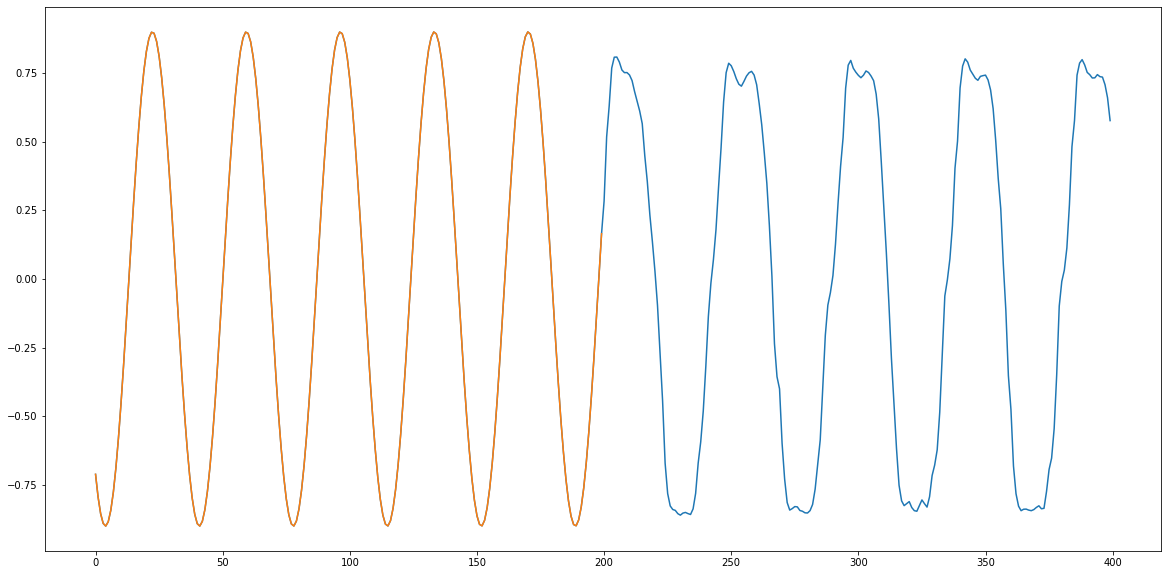

In [13]:
plt.figure(figsize=(20, 10))
t = x[0, 800:]
plt.plot(t.detach())
plt.plot(t[:-200].detach())
plt.show()

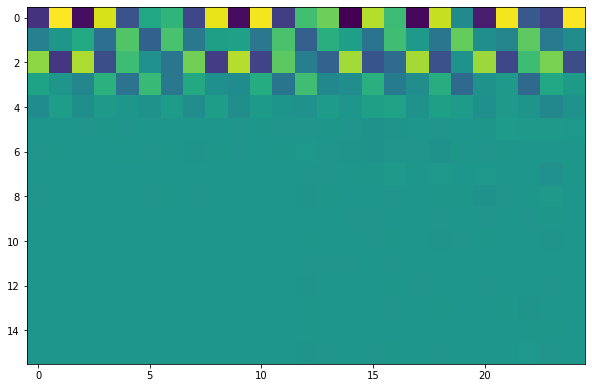

In [14]:
from dct import sdct
s = 16
w = sdct(t.detach().numpy(), frame_length=s, frame_step=s)
plt.figure(figsize=(10, 10))
plt.imshow(w)
plt.show()